In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [9]:
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from kvae import VariationalAutoencoder

plt.style.use('ggplot')

%matplotlib inline

In [10]:
batch_size = 128
latent_dim = 2

intermediate_dims = [512, 256, 128, 64] # 137.45

epochs = 10

In [11]:
# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

input_dim = x_train.shape[1]

x_train.shape, x_test.shape, input_dim

((60000, 784), (10000, 784), 784)

In [16]:
vae = VariationalAutoencoder.from_file("/home/yannick/tmp/vae.json", "/home/yannick/tmp/w.h5")
#vae = VariationalAutoencoder.from_file("/home/yannick/tmp/vae.json")

vae.summary()

/home/yannick/Work/github/Spikes/python/kvae.py:89: UserWarning: Output "custom_variational_layer_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_2" during training.
  vae.compile(optimizer='rmsprop', loss=None)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 512)          401920      input_3[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 256)          131328      dense_12[0][0]                   
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 128)          32896       dense_13[0][0]                   
__________________________________________________________________________________________________
dense_15 (

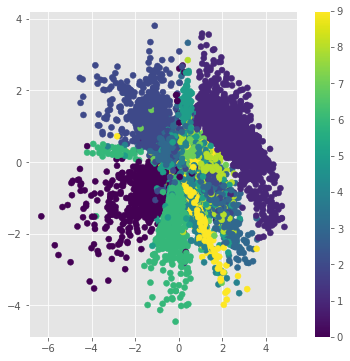

In [17]:
x_test_encoded = vae.encode(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()

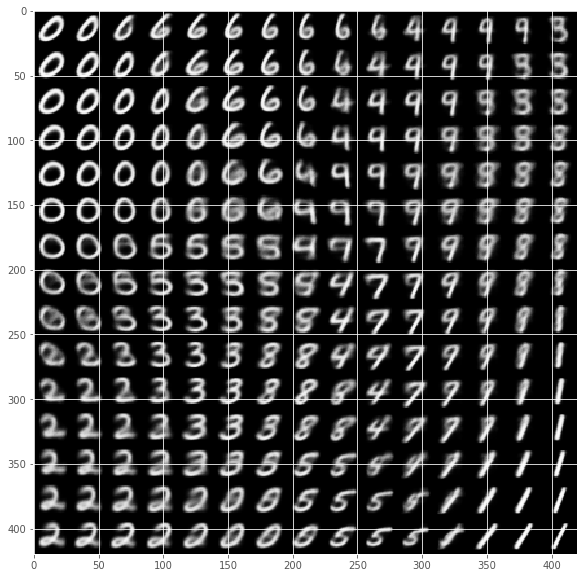

In [18]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.generate(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')

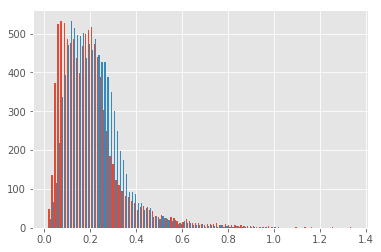

In [19]:
z_sigma_test = vae.sigmaEncode(x_test, batch_size=batch_size)

_ = plt.hist(z_sigma_test, bins=100)